# Performance and Optimization with Dimensionality Reduction

## Data Generation

Generate a synthetic dataset with 50,000 instances and 300 features for a classification problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50000, n_features=300, n_informative=50,
                           n_redundant=50, n_clusters_per_class=1, weights=[0.5, 0.5],
                           flip_y=0.01, class_sep=1.0, random_state=42)
X.shape, y.shape

((50000, 300), (50000,))

Split to training and test datasets.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 300), (40000,), (10000, 300), (10000,))

## Dimensionality Reduction

Applying PCA

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((40000, 31), (10000, 31))

After applying PCA, the number of features is reduced to 31.

## Model Training and Evaluation

Training and Evaluation: Original dataset

CPU times: total: 13.9 s
Wall time: 1min 5s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4993
           1       0.98      0.98      0.98      5007

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot: >

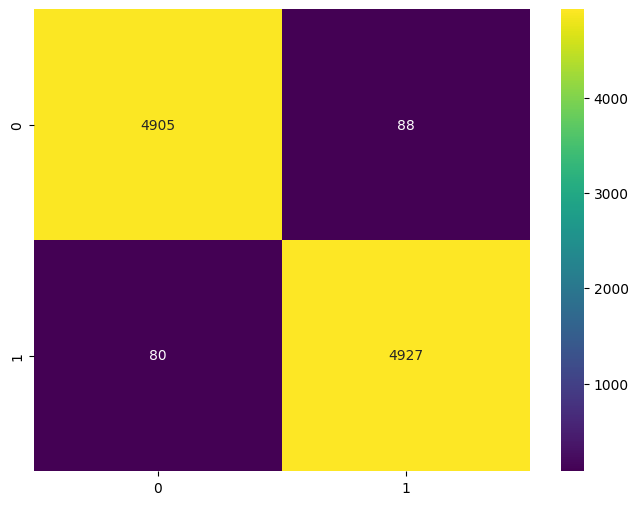

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
%time rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

Training and Evaluation: PCA-transformed dataset

CPU times: total: 7.8 s
Wall time: 15.9 s
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4993
           1       0.97      0.97      0.97      5007

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<AxesSubplot: >

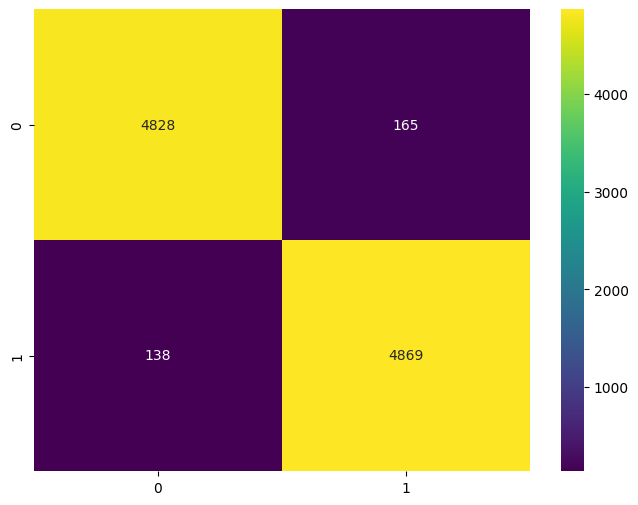

In [5]:
rf_pca = RandomForestClassifier(random_state=42)
%time rf_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

cm_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='viridis')

## Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 

rf_pca = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_pca, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

Training model using the best parameters.

CPU times: total: 11.5 s
Wall time: 31.8 s
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4993
           1       0.97      0.98      0.97      5007

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<AxesSubplot: >

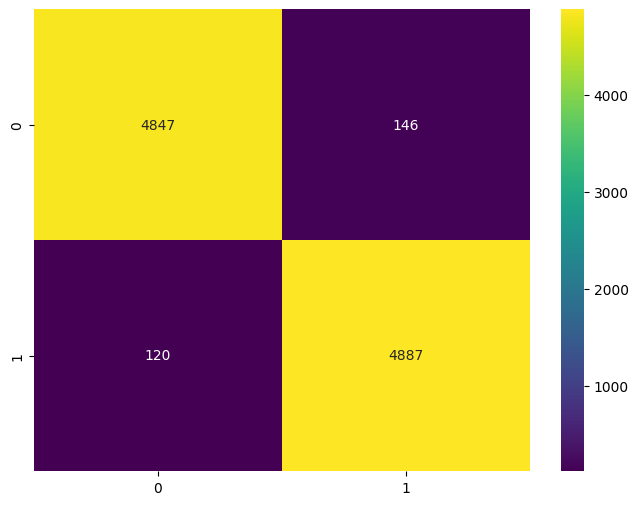

In [7]:
rf_pca_best = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42)
%time rf_pca_best.fit(X_train_pca, y_train)

y_pred_pca_best = rf_pca_best.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca_best))

cm_pca_best = confusion_matrix(y_test, y_pred_pca_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca_best, annot=True, fmt='d', cmap='viridis')

## Analysis

Impact of dimensionality reduction:
- Reduced features from 300 to 31
- Resulting in optimized model training from 13.9s to 7.8s for CPU time and 1min 5s to 15.9s for Wall time
- Maintained performance (accuracy, precision, recall, f1-score) for lesser training time

Impact of hyperparameter tuning:
- Able to reduce the number of incorrect predictions from 165 to 146 for class 0 and 138 to 120 for class 1